In [97]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


<h3>Se realiza la extracion del primer dataset llamado "Penetración del Internet fijo por provincia (accesos por cada 100 hogares)"<h3>

In [98]:
#1
UrlPIFijo = pd.read_csv('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-DEL-INTER-FIJO-51614/data.csv/?auth_key=mq92WEwEYUjLhVpFrXswBTfMiHGadguGzHVVEdlN')
UrlPIFijo

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"
...,...,...,...,...
835,2014,1,Santa Cruz,"28,94"
836,2014,1,Santa Fe,"47,85"
837,2014,1,Santiago Del Estero,"16,31"
838,2014,1,Tierra Del Fuego,"63,97"


Odtenemos la informacion de dataset extraido; como son: 
* los datos por columnas
* Las estadisticas por columnas

In [99]:
UrlPIFijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [100]:
UrlPIFijo.describe()

,Año,Trimestre
count,840.000000,840.000000
mean,2017.885714,2.457143
std,2.528745,1.105009
min,2014.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


Para Sacar el dato grafico de la columna "Accesos por cada 100 hogares" es necesario tranformar la columna al tipo de dato float

In [101]:
UrlPIFijo["Accesos por cada 100 hogares"]=UrlPIFijo["Accesos por cada 100 hogares"].str.replace(",",".")

In [102]:
UrlPIFijo["Año"]=UrlPIFijo["Año"].astype(str) 
UrlPIFijo["Trimestre"]=UrlPIFijo["Trimestre"].astype(dtype=str) 
UrlPIFijo["Accesos por cada 100 hogares"]=UrlPIFijo["Accesos por cada 100 hogares"].astype(dtype="float")


In [103]:
UrlPIFijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    object 
 1   Trimestre                     840 non-null    object 
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.4+ KB


Realizamos un muestreo de los datos de forma grafica 

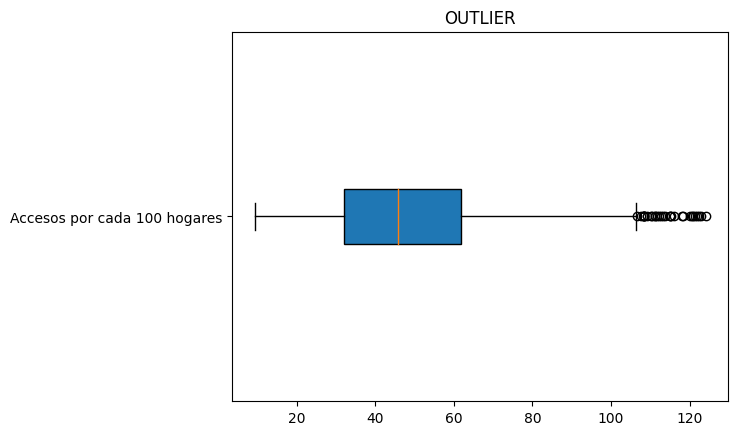

In [104]:
plt.boxplot(UrlPIFijo["Accesos por cada 100 hogares"],vert= False, patch_artist=True, labels=["Accesos por cada 100 hogares"])
plt.title("OUTLIER")
plt.show()

Realizamos una comparacion de la grafica entre el año y los "Accesos por cada 100 hogares"

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hogares'>

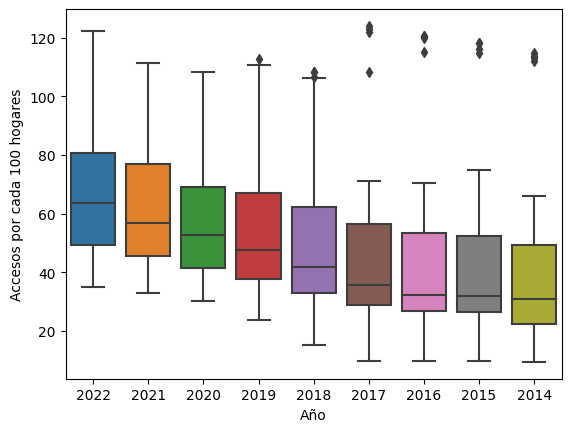

In [105]:
sns.boxplot(x="Año" , y="Accesos por cada 100 hogares", data=UrlPIFijo)

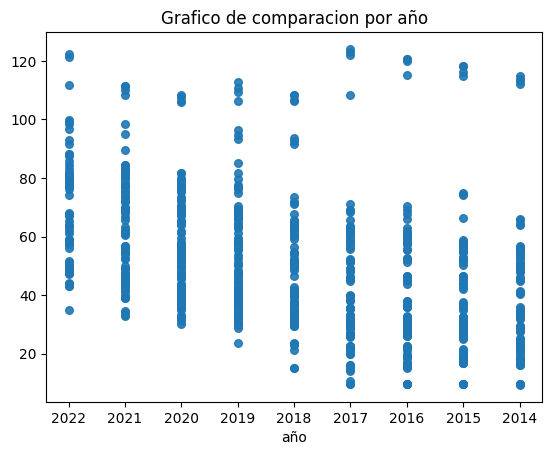

In [106]:
plt.scatter(UrlPIFijo["Año"],UrlPIFijo["Accesos por cada 100 hogares"],s=30 ,alpha=0.9 )
plt.xlabel("Accesos x cada 100 hogares")
plt.xlabel("año")
plt.title("Grafico de comparacion por año")
plt.show()


In [107]:
UrlPIFijo.columns

Index(['Año', 'Trimestre', 'Provincia', 'Accesos por cada 100 hogares'], dtype='object')

Generamos una columna nueva con el fin de crear un ID conla union de la columna año y trimestre, ya que posiblemente lo lleguemos a necesitar

In [108]:
UrlPIFijo['ID'] = UrlPIFijo.Año.str.cat(UrlPIFijo.Trimestre)
UrlPIFijo[['ID','Año','Trimestre','Provincia', 'Accesos por cada 100 hogares']].sort_values(['ID'],ascending=False)


,ID,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,20223,2022,3,Buenos Aires,78.11
13,20223,2022,3,Misiones,51.82
1,20223,2022,3,Capital Federal,122.28
23,20223,2022,3,Tucumán,61.14
22,20223,2022,3,Tierra Del Fuego,99.51
...,...,...,...,...,...
819,20141,2014,1,Chaco,20.72
818,20141,2014,1,Catamarca,24.25
817,20141,2014,1,Capital Federal,112.25
816,20141,2014,1,Buenos Aires,54.57


In [109]:
UrlPIFijo.to_csv("csv/Penetracion_acceso_100_hogares.csv",sep=",")

<h3>Extraemos los datos de la api "Accesos a banda ancha y banda angosta por provincia"<h3>

In [110]:
#2
BayBa = pd.read_csv('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/BANDA-ANCHA-Y-BANDA-ANGOS/data.csv/?auth_key=mq92WEwEYUjLhVpFrXswBTfMiHGadguGzHVVEdlN')
BayBa.columns


Index(['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up',
       'Total'],
      dtype='object')

Odtenemos la informacion de dataset extraido; como son: 
* los datos por columnas
* Las estadisticas por columnas

Comenzamos conociendo el nombre de cada columna

In [111]:
BayBa.columns

Index(['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up',
       'Total'],
      dtype='object')

In [112]:
BayBa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               840 non-null    int64 
 1   Trimestre         840 non-null    int64 
 2   Provincia         840 non-null    object
 3   Banda ancha fija  840 non-null    object
 4   Dial up           838 non-null    object
 5   Total             840 non-null    object
dtypes: int64(2), object(4)
memory usage: 39.5+ KB


Revizamos la infomacion estadistica del dataset

In [113]:
BayBa.describe(include="all")

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
count,840.000000,840.000000,840,840,838,840
unique,NaN,NaN,24,833,307,831
top,NaN,NaN,Buenos Aires,12.992,- 0,32.557
freq,NaN,NaN,35,3,59,3
mean,2017.885714,2.457143,NaN,NaN,NaN,NaN
std,2.528745,1.105009,NaN,NaN,NaN,NaN
min,2014.000000,1.000000,NaN,NaN,NaN,NaN
25%,2016.000000,1.000000,NaN,NaN,NaN,NaN
50%,2018.000000,2.000000,NaN,NaN,NaN,NaN
75%,2020.000000,3.000000,NaN,NaN,NaN,NaN


Creamos un ID en el dataset que indentifique el año y el trimestre 

In [114]:
BayBa["Año"]=BayBa["Año"].astype(str)
BayBa["Trimestre"]=BayBa["Trimestre"].astype(dtype=str)
BayBa['ID'] = BayBa.Año.str.cat(BayBa.Trimestre)

Visualizamos

In [115]:
BayBa

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total,ID
0,2022,3,Buenos Aires,4.715.469,6.199,4.721.668,20223
1,2022,3,Capital Federal,1.545.534,2.145,1.547.679,20223
2,2022,3,Catamarca,70.292,1,70.293,20223
3,2022,3,Chaco,144.141,5,144.146,20223
4,2022,3,Chubut,164.874,904,165.778,20223
...,...,...,...,...,...,...,...
835,2014,1,Santa Cruz,26.304,460,26.764,20141
836,2014,1,Santa Fe,506.000,612,506.612,20141
837,2014,1,Santiago Del Estero,37.124,9,37.133,20141
838,2014,1,Tierra Del Fuego,27.272,766,28.038,20141


Revizamos los valores unicos de la columna Dial Up ya que observamos valores que no queremos tener

In [116]:
BayBa["Dial up"].unique()

array(['6.199', '2.145', '1', '5', '904', '68', '4', '22', '- 0', '171',
       '777', '468', '548', '281', '182', '198', '110', '2', '312', '30',
       '6.293', '2.163', '927', '74', '0', '172', '786', '471', '553',
       '290', '185', '204', '115', '313', '6.385', '2.184', '944', '77',
       '173', '804', '477', '564', '6', '291', '187', '210', '176', '315',
       '5.184', '1.608', '3', '800', '62', '15', '116', '619', '373',
       '501', '256', '148', '197', '151', '289', '25', '825', '5.066',
       '1.390', '55', '13', '615', '137', '5.134', '1.410', '810', '119',
       '623', '376', '504', '259', '200', '150', '23', '10.119', '3.477',
       '9', '1.524', '107', '10', '45', '269', '18', '1.322', '1.986',
       '563', '328', '228', '544', '32', '10.104', '3.443', '1.518',
       '105', '44', '268', '1.999', '915', '325', '226', '2.056', '227',
       '229', '10.563', '6.686', '11', '12', '2.426', '94', '48', '244',
       '17', '1.484', '2.005', '1.059', '658', '300', '434'

Cambiamos los valores erroneos por los que queremos tener

In [117]:
BayBa.loc[BayBa["Dial up"] =="- 0", 'Dial up'] =0
BayBa["Dial up"]=BayBa["Dial up"].replace(np.nan,0)

Convertimos a enteros y copiamos el dataframe con el fin de proteger la informacion 

In [118]:
BayBa = BayBa.astype({'Año': 'Int64', 'Trimestre': 'Int64'})
BayBacopy=BayBa[['ID','Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up','Total']].copy()
BayBacopy

,ID,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,20223,2022,3,Buenos Aires,4.715.469,6.199,4.721.668
1,20223,2022,3,Capital Federal,1.545.534,2.145,1.547.679
2,20223,2022,3,Catamarca,70.292,1,70.293
3,20223,2022,3,Chaco,144.141,5,144.146
4,20223,2022,3,Chubut,164.874,904,165.778
...,...,...,...,...,...,...,...
835,20141,2014,1,Santa Cruz,26.304,460,26.764
836,20141,2014,1,Santa Fe,506.000,612,506.612
837,20141,2014,1,Santiago Del Estero,37.124,9,37.133
838,20141,2014,1,Tierra Del Fuego,27.272,766,28.038


Realizamos uns revicion de la informacion nuevamente

In [119]:
BayBacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                840 non-null    object
 1   Año               840 non-null    Int64 
 2   Trimestre         840 non-null    Int64 
 3   Provincia         840 non-null    object
 4   Banda ancha fija  840 non-null    object
 5   Dial up           840 non-null    object
 6   Total             840 non-null    object
dtypes: Int64(2), object(5)
memory usage: 47.7+ KB


Quitamos los puntos de las columnas numericas y que expresan miles 

In [120]:
BayBacopy["Dial up"]=BayBacopy["Dial up"].str.replace(".","")
BayBacopy["Banda ancha fija"]=BayBacopy["Banda ancha fija"].str.replace(".","")
BayBacopy["Total"]=BayBacopy["Total"].str.replace(".","")
BayBacopy

,ID,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,20223,2022,3,Buenos Aires,4715469,6199,4721668
1,20223,2022,3,Capital Federal,1545534,2145,1547679
2,20223,2022,3,Catamarca,70292,1,70293
3,20223,2022,3,Chaco,144141,5,144146
4,20223,2022,3,Chubut,164874,904,165778
...,...,...,...,...,...,...,...
835,20141,2014,1,Santa Cruz,26304,460,26764
836,20141,2014,1,Santa Fe,506000,612,506612
837,20141,2014,1,Santiago Del Estero,37124,9,37133
838,20141,2014,1,Tierra Del Fuego,27272,766,28038


llenamos los valores nulos con ceros y convertimos a enteros

In [121]:
BayBacopy["Dial up"]=BayBacopy["Dial up"].fillna("0")
BayBacopy["Dial up"]=BayBacopy["Dial up"].astype(dtype="int64")
BayBacopy["Banda ancha fija"]=BayBacopy["Banda ancha fija"].astype(dtype="int64")
BayBacopy["Total"]=BayBacopy["Total"].astype(dtype="int64")

Realizamos una comparacion de la grafica entre el año y los "Accesos por cada 100 hogares" e indentificamos los outlier.

<Axes: xlabel='Año', ylabel='Dial up'>

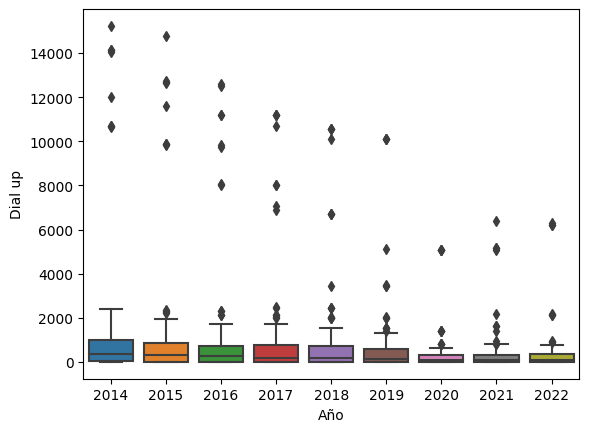

In [122]:
sns.boxplot(x="Año" , y="Dial up", data=BayBacopy)

<Axes: xlabel='Año', ylabel='Banda ancha fija'>

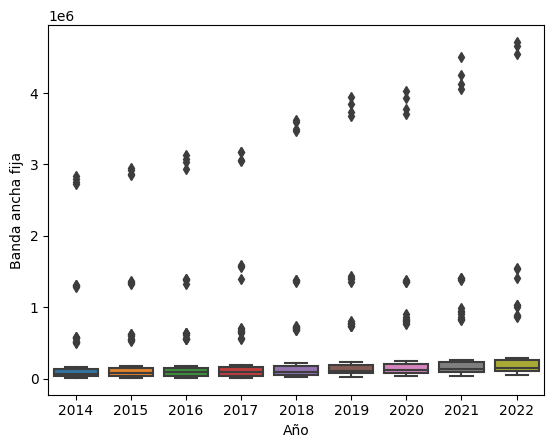

In [123]:
sns.boxplot(x="Año" , y="Banda ancha fija", data=BayBacopy)

In [124]:
BayBacopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                840 non-null    object
 1   Año               840 non-null    Int64 
 2   Trimestre         840 non-null    Int64 
 3   Provincia         840 non-null    object
 4   Banda ancha fija  840 non-null    int64 
 5   Dial up           840 non-null    int64 
 6   Total             840 non-null    int64 
dtypes: Int64(2), int64(3), object(2)
memory usage: 47.7+ KB


Cargamos el dataset y con esto ya podemos realizar estos mismos paso en power bi o copiar el dataset 

In [125]:
BayBacopy.to_csv("csv/Acceso_banda_provincia.csv",sep=",")

<h3>Extraemos los datos de la api "Acceso a Internet fijo por tecnología y provincia" <h3>

In [126]:
AIFijoPorTyP = pd.read_csv('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-POR/data.csv/?auth_key=mq92WEwEYUjLhVpFrXswBTfMiHGadguGzHVVEdlN')
AIFijoPorTyP

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778
...,...,...,...,...,...,...,...,...,...
836,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
837,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038
839,2014,1,Tucumán,129.717,83,121,13.000,98.000,130.032


Analizó la información del dataset, llamado datageneral dónde se encuentran ya unidos todos los datasets.

In [127]:
AIFijoPorTyP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


Extraemos los nombres de las columnas del Datageneral y que son categóricas.

In [128]:
AIFijoPorTyP.columns

Index(['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica',
       'Wireless', 'Otros', 'Total'],
      dtype='object')

Extraemos los nombres de las columna que vamos cambiar, para examinar los subniveles, mirar columnas con un único valor, etc.

In [129]:
col_categoricas=['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica','Total']

Realizamos un análisis para saber si le podemos sacar los subniveles a algunas columnas a través de Dummies con una lista de los nombres de las columnas categóricas, anteriormente extraídas.

In [130]:
listNivel=[]
nomCol=[]
for col in col_categoricas:
    listNivel.append(col)
    nomCol.append(AIFijoPorTyP[col].nunique())
#   #print(f"columna { col } : { dataHospital[col].nunique()}  subniveles")
subniveles=pd.DataFrame(list(zip(nomCol,listNivel)),columns=["Subniveles","Nombre"])
subniveles.sort_values("Subniveles",ascending=True)

,Subniveles,Nombre
1,8,Trimestre
0,11,Año
2,24,Provincia
5,592,Fibra óptica
4,729,Cablemodem
3,748,ADSL
6,831,Total


Se realiza la revicion ya que los datos unicos con los datos reales no concuerdan ejemplo el años solo tiene 4 trimestres y muestra 8, por tal motivo procedemos a revisar las columnas mas relevantes  

In [131]:
AIFijoPorTyP["Año"].unique()

array(['2022', '2021', '2020', '2019', '2019 *', '2018', '2017', '2016',
       '2015', '2014', '*'], dtype=object)

In [132]:
AIFijoPorTyP["Trimestre"].unique()

array(['3', '2', '1', '4', '3 *', '2 *', '1 *',
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

Revizamos si los datos con asteriscos con cuerdan con el año

In [133]:
AIFijoPorTyP[AIFijoPorTyP["Año"]=='2019 *']

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
288,2019 *,3 *,Buenos Aires,1.277.249,2.144.956,425.386,85.572,27.070,3.960.233
289,2019 *,3 *,Capital Federal,300.288,1.080.973,24.900,3.895,31.155,1.441.211
290,2019 *,3 *,Catamarca,24.349,5.543,13,244.000,2.251,32.400
291,2019 *,3 *,Chaco,50.416,49.156,8.063,5.224,1.592,114.451
292,2019 *,3 *,Chubut,37.298,27.090,1.917,15.149,7.551,89.005
...,...,...,...,...,...,...,...,...,...
355,2019 *,1 *,Santa Cruz,10.659,4.615,382,6.514,2.735,24.905
356,2019 *,1 *,Santa Fe,340.038,340.344,15.621,23.215,17.860,737.078
357,2019 *,1 *,Santiago Del Estero,25.337,61.547,23,2.847,99.000,89.853
358,2019 *,1 *,Tierra Del Fuego,19.789,23.549,1.623,0.000,1.486,46.447


Realizamos la estandarizacion de los datos para posteriormente transformarlos a enteros

In [134]:
AIFijoPorTyP.loc[AIFijoPorTyP["Año"] =="2019 *", 'Año'] =2019 
AIFijoPorTyP.loc[AIFijoPorTyP["Trimestre"] =="4 *", 'Trimestre'] =4 
AIFijoPorTyP.loc[AIFijoPorTyP["Trimestre"] =="3 *", 'Trimestre'] =3
AIFijoPorTyP.loc[AIFijoPorTyP["Trimestre"] =="2 *", 'Trimestre'] =2
AIFijoPorTyP.loc[AIFijoPorTyP["Trimestre"] =="1 *", 'Trimestre'] =1

Eliminamos la columna sin informacion

In [135]:
AIFijoPorTyP[AIFijoPorTyP["Año"]=="*"].count()

Año             1
Trimestre       1
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [136]:
AIFijoPorTyP.drop(AIFijoPorTyP[AIFijoPorTyP["Año"]=="*"].index, inplace=True)

verificamos la eliminacion de la fila sin datos

In [137]:
AIFijoPorTyP.shape

(840, 9)

In [138]:
AIFijoPorTyP[AIFijoPorTyP["Año"]=="*"].count()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

In [139]:
col_categoricas=[ 'ADSL', 'Cablemodem', 'Fibra óptica','Total']

Convertimos las columnas "Wireless" y "Otros" a string para poder quitarle los puntos

In [140]:
AIFijoPorTyP["Wireless"]=AIFijoPorTyP["Wireless"].astype(dtype="str")
AIFijoPorTyP["Otros"]=AIFijoPorTyP["Otros"].astype(dtype="str")

In [141]:
#quitando los punto
AIFijoPorTyP["ADSL"]=AIFijoPorTyP["ADSL"].str.replace(".","")
AIFijoPorTyP["Cablemodem"]=AIFijoPorTyP["Cablemodem"].str.replace(".","")
AIFijoPorTyP["Fibra óptica"]=AIFijoPorTyP["Fibra óptica"].str.replace(".","")
AIFijoPorTyP["Total"]=AIFijoPorTyP["Total"].str.replace(".","")
AIFijoPorTyP["Wireless"]=AIFijoPorTyP["Wireless"].str.replace(".","")
AIFijoPorTyP["Otros"]=AIFijoPorTyP["Otros"].str.replace(".","")

In [142]:
# comvirtiendo a entero
AIFijoPorTyP["ADSL"]=AIFijoPorTyP["ADSL"].astype(dtype="Int64")
AIFijoPorTyP["Cablemodem"]=AIFijoPorTyP["Cablemodem"].astype(dtype="Int64")
AIFijoPorTyP["Fibra óptica"]=AIFijoPorTyP["Fibra óptica"].astype(dtype="Int64")
AIFijoPorTyP["Total"]=AIFijoPorTyP["Total"].astype(dtype="Int64")
AIFijoPorTyP["Wireless"]=AIFijoPorTyP["Wireless"].astype(dtype="Int64")
AIFijoPorTyP["Otros"]=AIFijoPorTyP["Otros"].astype(dtype="Int64")

In [143]:
#AIFijoPorTyP["ADSL"].sort_values(ascending = True).unique()

In [144]:
AIFijoPorTyP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           840 non-null    object
 1   Trimestre     840 non-null    object
 2   Provincia     840 non-null    object
 3   ADSL          840 non-null    Int64 
 4   Cablemodem    840 non-null    Int64 
 5   Fibra óptica  840 non-null    Int64 
 6   Wireless      840 non-null    Int64 
 7   Otros         840 non-null    Int64 
 8   Total         840 non-null    Int64 
dtypes: Int64(6), object(3)
memory usage: 64.1+ KB


Creamos un id con los datos que tenemos en modo de indentificar año y trimestre

In [145]:
AIFijoPorTyP["Año"]=AIFijoPorTyP["Año"].astype(str)
AIFijoPorTyP["Trimestre"]=AIFijoPorTyP["Trimestre"].astype(dtype=str)
AIFijoPorTyP['ID'] = AIFijoPorTyP.Año.str.cat(AIFijoPorTyP.Trimestre)

In [146]:
AIFijoPorTyP.head(2)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,ID
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668,20223
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679,20223


<Axes: xlabel='Año', ylabel='ADSL'>

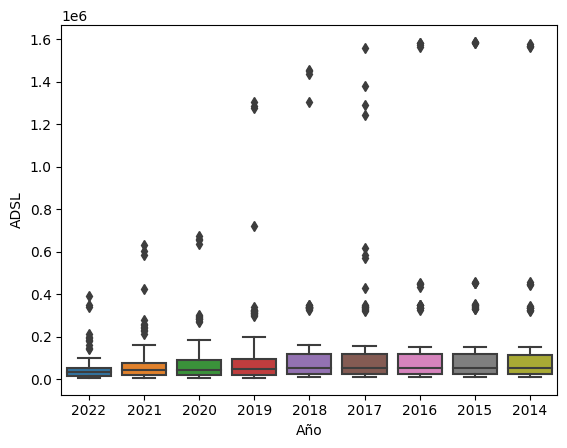

In [147]:
sns.boxplot(x="Año" , y="ADSL", data=AIFijoPorTyP)

<Axes: xlabel='Año', ylabel='Cablemodem'>

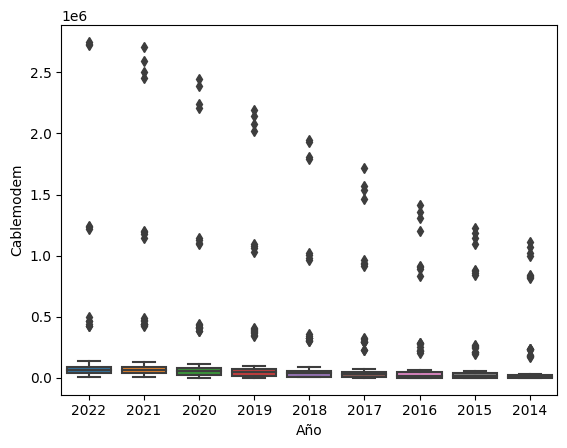

In [148]:
sns.boxplot(x="Año" , y="Cablemodem", data=AIFijoPorTyP)

<Axes: xlabel='Año', ylabel='Fibra óptica'>

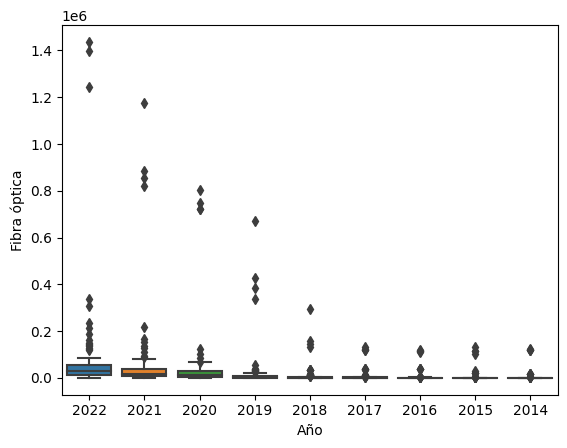

In [149]:
sns.boxplot(x="Año" , y="Fibra óptica", data=AIFijoPorTyP)

<Axes: xlabel='Año', ylabel='Wireless'>

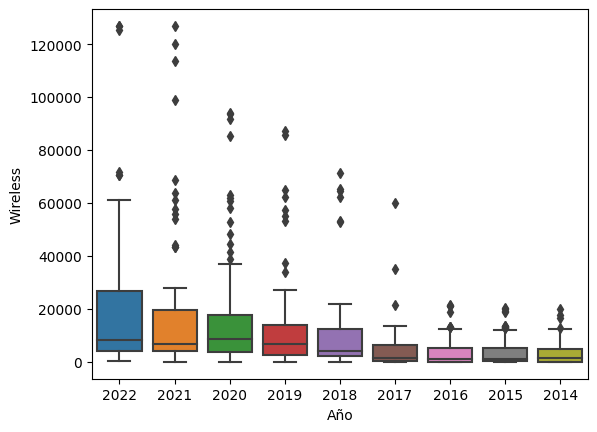

In [150]:
sns.boxplot(x="Año" , y="Wireless", data=AIFijoPorTyP)

<Axes: xlabel='Wireless', ylabel='Provincia'>

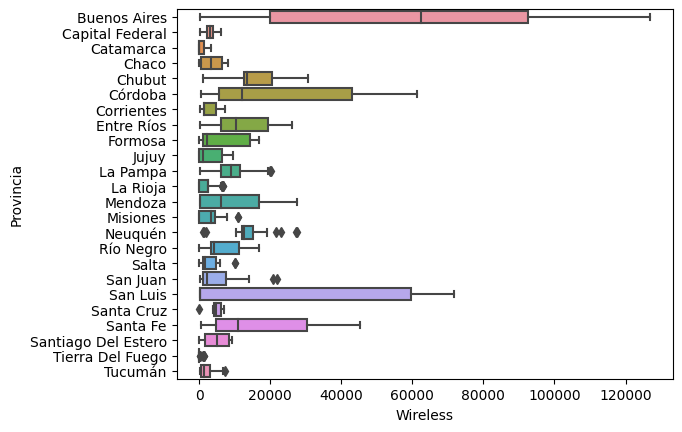

In [151]:
sns.boxplot(x="Wireless" , y="Provincia", data=AIFijoPorTyP)

<Axes: xlabel='Fibra óptica', ylabel='Provincia'>

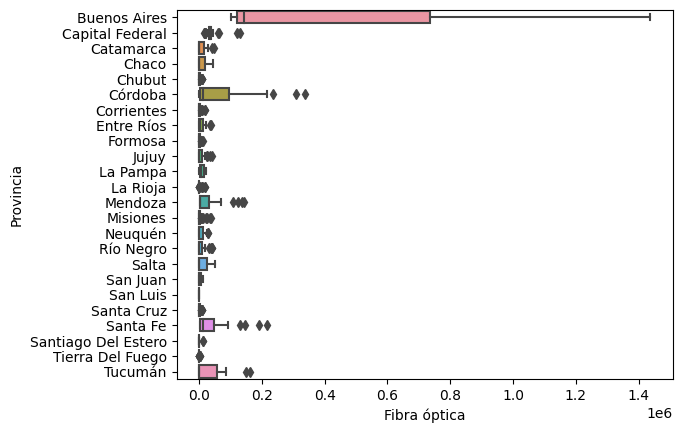

In [152]:
sns.boxplot(x="Fibra óptica" , y="Provincia", data=AIFijoPorTyP)

In [153]:
AIFijoPorTyP.head(2)

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,ID
0,2022,3,Buenos Aires,339648,2748325,1436433,126846,70416,4721668,20223
1,2022,3,Capital Federal,140791,1240125,129218,5758,31787,1547679,20223


<function matplotlib.pyplot.show(close=None, block=None)>

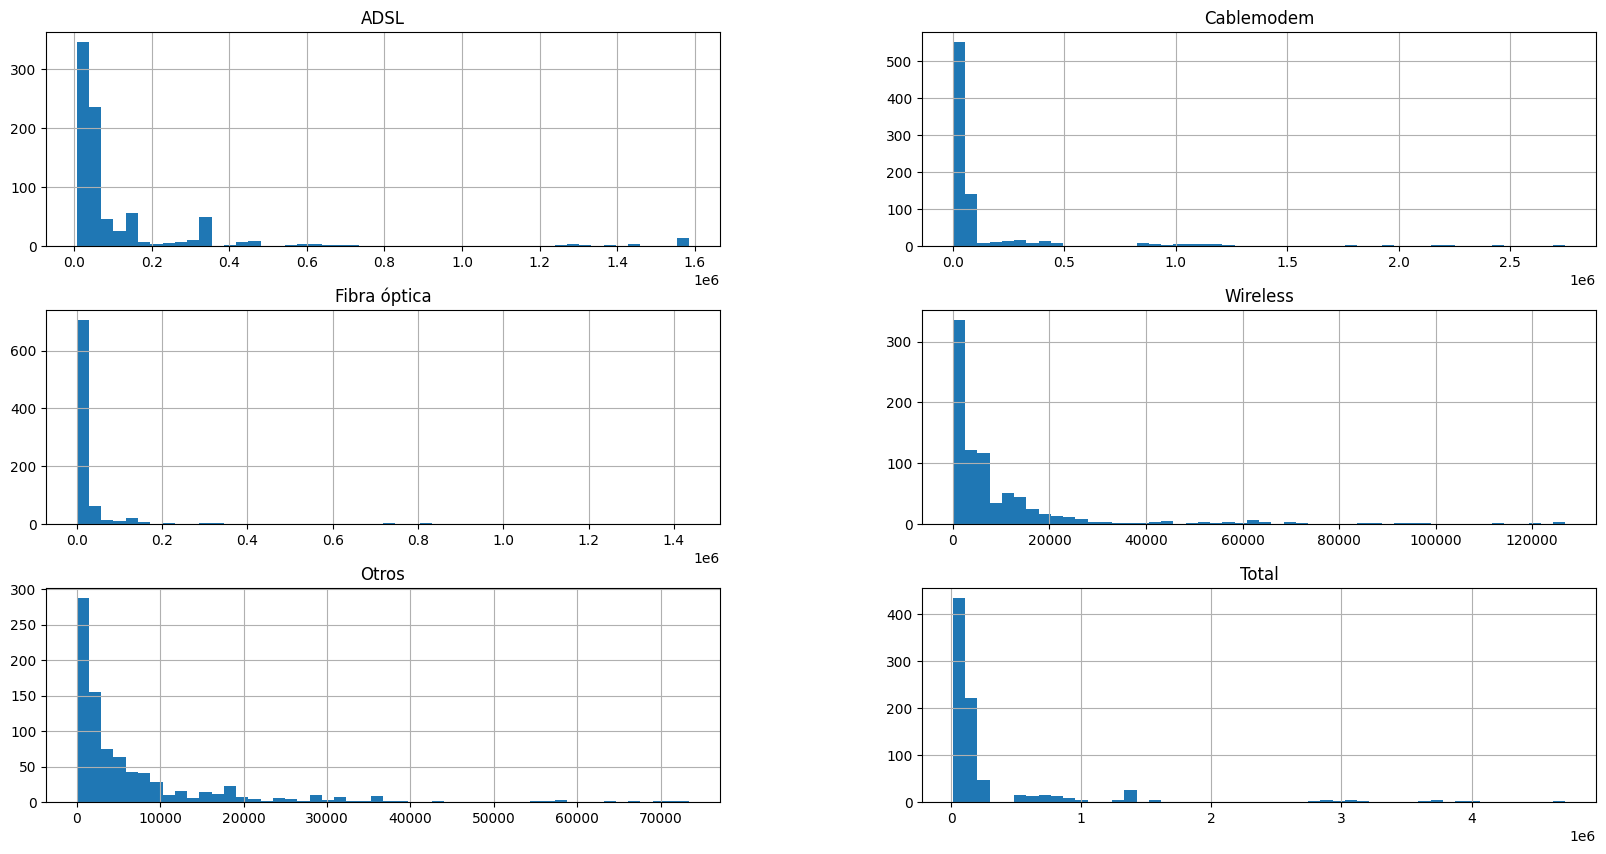

In [154]:
import matplotlib.pyplot as plt
AIFijoPorTyP.hist(bins = 50, figsize = (20,10))
plt.show

<h2>Accesos a Internet fijo por tecnología y localidad<h2>

<h2>Accesos a Internet fijo por tecnología y localidad<h2>
Extraemos y Observamos la informacion suministrada

In [155]:

#4
AIFijoPorTyL = pd.read_csv('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-62463/data.csv/?auth_key=mq92WEwEYUjLhVpFrXswBTfMiHGadguGzHVVEdlN')
AIFijoPorTyL

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,- 0,1,- 0,471,- 0,- 0,- 0,- 0,472,NaN
3138,TUCUMAN,Trancas,San Pedro de Colalao,90112020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,313,313,NaN
3139,TUCUMAN,Trancas,Villa de Trancas,90112030,150,- 0,- 0,- 0,33,- 0,- 0,99,282,NaN
3140,TUCUMAN,Yerba Buena,Villa Carmela,90119020,1.725,- 0,- 0,- 0,1,- 0,- 0,97,1.823,NaN


Decido no realizar proceso alguno en la tabla anteriormente extraidad ya que, la informacion es muy general y casi repetida. 

<h2>Velocidad media de bajada de Internet fijo por provincia

In [156]:
#5
VMBdeIFijoPorP= pd.read_csv('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/VELOC-PROME-DE-BAJAD-DE/data.csv/?auth_key=mq92WEwEYUjLhVpFrXswBTfMiHGadguGzHVVEdlN')
VMBdeIFijoPorP

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN
...,...,...,...,...,...,...
835,2014,1,Santa Cruz,3,NaN,NaN
836,2014,1,Santa Fe,3,NaN,NaN
837,2014,1,Santiago Del Estero,3,NaN,NaN
838,2014,1,Tierra Del Fuego,3,NaN,NaN


Extraemos las columnas que necesitamos

In [157]:
VMBdeIFijoPorP.columns

Index(['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [158]:
col=['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)']

In [159]:
VMBdeIFijoPorP=VMBdeIFijoPorP[['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)']].copy()
VMBdeIFijoPorP

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,3,Buenos Aires,70
1,2022,3,Capital Federal,101
2,2022,3,Catamarca,61
3,2022,3,Chaco,53
4,2022,3,Chubut,16
...,...,...,...,...
835,2014,1,Santa Cruz,3
836,2014,1,Santa Fe,3
837,2014,1,Santiago Del Estero,3
838,2014,1,Tierra Del Fuego,3


In [160]:
VMBdeIFijoPorP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     840 non-null    int64 
 1   Trimestre               840 non-null    int64 
 2   Provincia               840 non-null    object
 3   Mbps (Media de bajada)  840 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


In [161]:
VMBdeIFijoPorP.describe(include="all")

,Año,Trimestre,Provincia,Mbps (Media de bajada)
count,840.000000,840.000000,840,840.000000
unique,NaN,NaN,24,NaN
top,NaN,NaN,Buenos Aires,NaN
freq,NaN,NaN,35,NaN
mean,2017.885714,2.457143,NaN,13.841667
std,2.528745,1.105009,NaN,14.669499
min,2014.000000,1.000000,NaN,3.000000
25%,2016.000000,1.000000,NaN,4.000000
50%,2018.000000,2.000000,NaN,7.000000
75%,2020.000000,3.000000,NaN,18.000000


Revizando los datos nos damos cuenta que todos los datos estan bien, procedemos a realizar todos los cambios que necesitamos para un buen analisis
* creamos una columna ID

In [162]:
VMBdeIFijoPorP["Año"]=VMBdeIFijoPorP["Año"].astype(str)
VMBdeIFijoPorP["Trimestre"]=VMBdeIFijoPorP["Trimestre"].astype(dtype=str)
VMBdeIFijoPorP['ID'] = VMBdeIFijoPorP.Año.str.cat(VMBdeIFijoPorP.Trimestre)

In [163]:
VMBdeIFijoPorP.sort_values(by="ID",ascending=True,inplace=True)

In [164]:
VMBdeIFijoPorP=VMBdeIFijoPorP[["ID",'Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)']].copy()
VMBdeIFijoPorP

,ID,Año,Trimestre,Provincia,Mbps (Media de bajada)
839,20141,2014,1,Tucumán,3
816,20141,2014,1,Buenos Aires,4
817,20141,2014,1,Capital Federal,4
818,20141,2014,1,Catamarca,3
819,20141,2014,1,Chaco,3
...,...,...,...,...,...
21,20223,2022,3,Santiago Del Estero,18
22,20223,2022,3,Tierra Del Fuego,11
23,20223,2022,3,Tucumán,53
12,20223,2022,3,Mendoza,34


In [165]:
#https://infra.datos.gob.ar/catalog/modernizacion/dataset/7/distribution/7.2/download/provincias.json


In [166]:
#6
gDATNIfijoPorVel= pd.read_csv("https://datosabiertos.enacom.gob.ar/rest/datastreams/280921/data.csv/?auth_key=mq92WEwEYUjLhVpFrXswBTfMiHGadguGzHVVEdlN")

** Informacion y descripcion por tablas**

In [167]:
# 1.)
UrlPIFijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    object 
 1   Trimestre                     840 non-null    object 
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
 4   ID                            840 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.9+ KB


<h2>Accesos a Internet fijo por tecnología y localidad<h2>

Extraemos y Observamos la informacion suministrada

In [168]:
#4
AIFijoPorTyL = pd.read_csv('http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/ACCES-A-INTER-FIJO-62463/data.csv/?auth_key=mq92WEwEYUjLhVpFrXswBTfMiHGadguGzHVVEdlN')
AIFijoPorTyL

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,- 0,1,- 0,471,- 0,- 0,- 0,- 0,472,NaN
3138,TUCUMAN,Trancas,San Pedro de Colalao,90112020,- 0,- 0,- 0,- 0,- 0,- 0,- 0,313,313,NaN
3139,TUCUMAN,Trancas,Villa de Trancas,90112030,150,- 0,- 0,- 0,33,- 0,- 0,99,282,NaN
3140,TUCUMAN,Yerba Buena,Villa Carmela,90119020,1.725,- 0,- 0,- 0,1,- 0,- 0,97,1.823,NaN


In [169]:
#4
AIFijoPorTyL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [170]:
AIFijoPorTyL.describe(include="all")

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
count,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,0.0
unique,24,432,2850,2718,724,693,86,706,219,24,12,606,1348,NaN
top,BUENOS AIRES,General Roca,OTROS,Sin Datos,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,1,NaN
freq,716,57,69,72,2016,2295,2760,1743,2537,2089,3131,934,193,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
AIFijoPorTyL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


<h2> Distribución de los accesos totales nacionales a Internet fijo por velocidad.

Se re realiza la extracion "Distribución de los accesos totales nacionales a Internet fijo por velocidad"

In [172]:
gDATNIfijoPorVel=pd.read_csv("http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/TOTAL-NACIO-DE-ACCES-32663/data.csv/?auth_key=mq92WEwEYUjLhVpFrXswBTfMiHGadguGzHVVEdlN")
#gDATNIfijoPorVel= pd.read_csv("https://datosabiertos.enacom.gob.ar/rest/datastreams/280921/data.csv/?auth_key=mq92WEwEYUjLhVpFrXswBTfMiHGadguGzHVVEdlN")

Tratamos de dar una vista preliminar de los datos

In [173]:
gDATNIfijoPorVel.head(2)

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total,Unnamed: 11
0,2022,3,33.013,96.727,1.161.370,1.151.906,823.505,479.822,6.995.750,349.035,11.091.128,NaN
1,2022,2,33.667,99.498,1.193.090,1.197.030,856.562,485.321,6.741.922,351.594,10.958.684,NaN


Conocemos la informacion que manejamos

In [174]:
gDATNIfijoPorVel.shape

(35, 12)

In [175]:
gDATNIfijoPorVel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Año                      35 non-null     int64  
 1   Trimestre                35 non-null     int64  
 2   Hasta 512 kbps           35 non-null     float64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     float64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     object 
 5   Entre 6 Mbps y 10 Mbps   35 non-null     object 
 6   Entre 10 Mbps y 20 Mbps  35 non-null     object 
 7   Entre 20 Mbps y 30 Mbps  35 non-null     object 
 8   Más de 30 Mbps           35 non-null     object 
 9   OTROS                    35 non-null     float64
 10  Total                    35 non-null     object 
 11  Unnamed: 11              0 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 3.4+ KB


Se extraen las columnas que se creen que van a usar, pero antes ya fuero observadas en la pagina de enacom

In [176]:

gDATNIfijoPorVel=gDATNIfijoPorVel[['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total']]

Le quitamos a las columnas y las combertimos a enteros

In [177]:
for i in gDATNIfijoPorVel.columns:
    gDATNIfijoPorVel[i]=gDATNIfijoPorVel[i].astype(str)
    gDATNIfijoPorVel[i]=gDATNIfijoPorVel[i].str.replace(".","")
    gDATNIfijoPorVel[i]=gDATNIfijoPorVel[i].str.replace(",","")
gDATNIfijoPorVel=gDATNIfijoPorVel.astype(dtype="int")


Revizamos nuevamente la informacion

In [178]:
gDATNIfijoPorVel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      35 non-null     int32
 1   Trimestre                35 non-null     int32
 2   Hasta 512 kbps           35 non-null     int32
 3   Entre 512 Kbps y 1 Mbps  35 non-null     int32
 4   Entre 1 Mbps y 6 Mbps    35 non-null     int32
 5   Entre 6 Mbps y 10 Mbps   35 non-null     int32
 6   Entre 10 Mbps y 20 Mbps  35 non-null     int32
 7   Entre 20 Mbps y 30 Mbps  35 non-null     int32
 8   Más de 30 Mbps           35 non-null     int32
 9   OTROS                    35 non-null     int32
 10  Total                    35 non-null     int32
dtypes: int32(11)
memory usage: 1.6 KB


In [179]:
gDATNIfijoPorVel.describe(include="all")

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,35.000000,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,3.500000e+01
mean,2017.885714,2.457143,36421.485714,224413.371429,3.623279e+06,8.975174e+05,9.190145e+05,5.037122e+05,1.900309e+06,115141.342857,8.255731e+06
std,2.564135,1.120474,45447.723312,208186.625270,1.292407e+06,2.462911e+05,4.881587e+05,4.717638e+05,2.357935e+06,114321.115210,1.442421e+06
min,2014.000000,1.000000,3489.000000,2898.000000,1.161370e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.000000,6.272846e+06
25%,2016.000000,1.500000,14457.500000,41849.000000,2.643902e+06,7.799985e+05,6.674615e+05,5.082050e+04,2.620000e+04,0.000000,7.029346e+06
50%,2018.000000,2.000000,33013.000000,215406.000000,3.428759e+06,9.769560e+05,8.144700e+05,5.098300e+05,4.443910e+05,155145.000000,8.110444e+06
75%,2020.000000,3.000000,41038.000000,339317.000000,4.996999e+06,1.057958e+06,1.149810e+06,6.396735e+05,3.882480e+06,196292.000000,9.260442e+06
max,2022.000000,4.000000,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,6.995750e+06,351594.000000,1.109113e+07


In [180]:
gDATNIfijoPorVel.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
1,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
2,2022,1,3489,10484,1263273,1209148,967508,509830,6336187,198333,10624009
3,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794
4,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541


Creamos una columna "ID_velocidad_Bajada" ya se podria usar mas adelante

In [181]:
gDATNIfijoPorVel["Año"]=gDATNIfijoPorVel["Año"].astype(str)
gDATNIfijoPorVel["Trimestre"]=gDATNIfijoPorVel["Trimestre"].astype(dtype=str)
gDATNIfijoPorVel['ID_velocidad_Bajada'] = gDATNIfijoPorVel.Año.str.cat(gDATNIfijoPorVel.Trimestre)

In [182]:

gDATNIfijoPorVel=gDATNIfijoPorVel[['ID_velocidad_Bajada','Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps',
       'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps',
       'OTROS', 'Total']].copy()

In [183]:
gDATNIfijoPorVel.head(2)

,ID_velocidad_Bajada,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,20223,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
1,20222,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684


Realizamos una revicion a los datos de velocidades 

<function matplotlib.pyplot.show(close=None, block=None)>

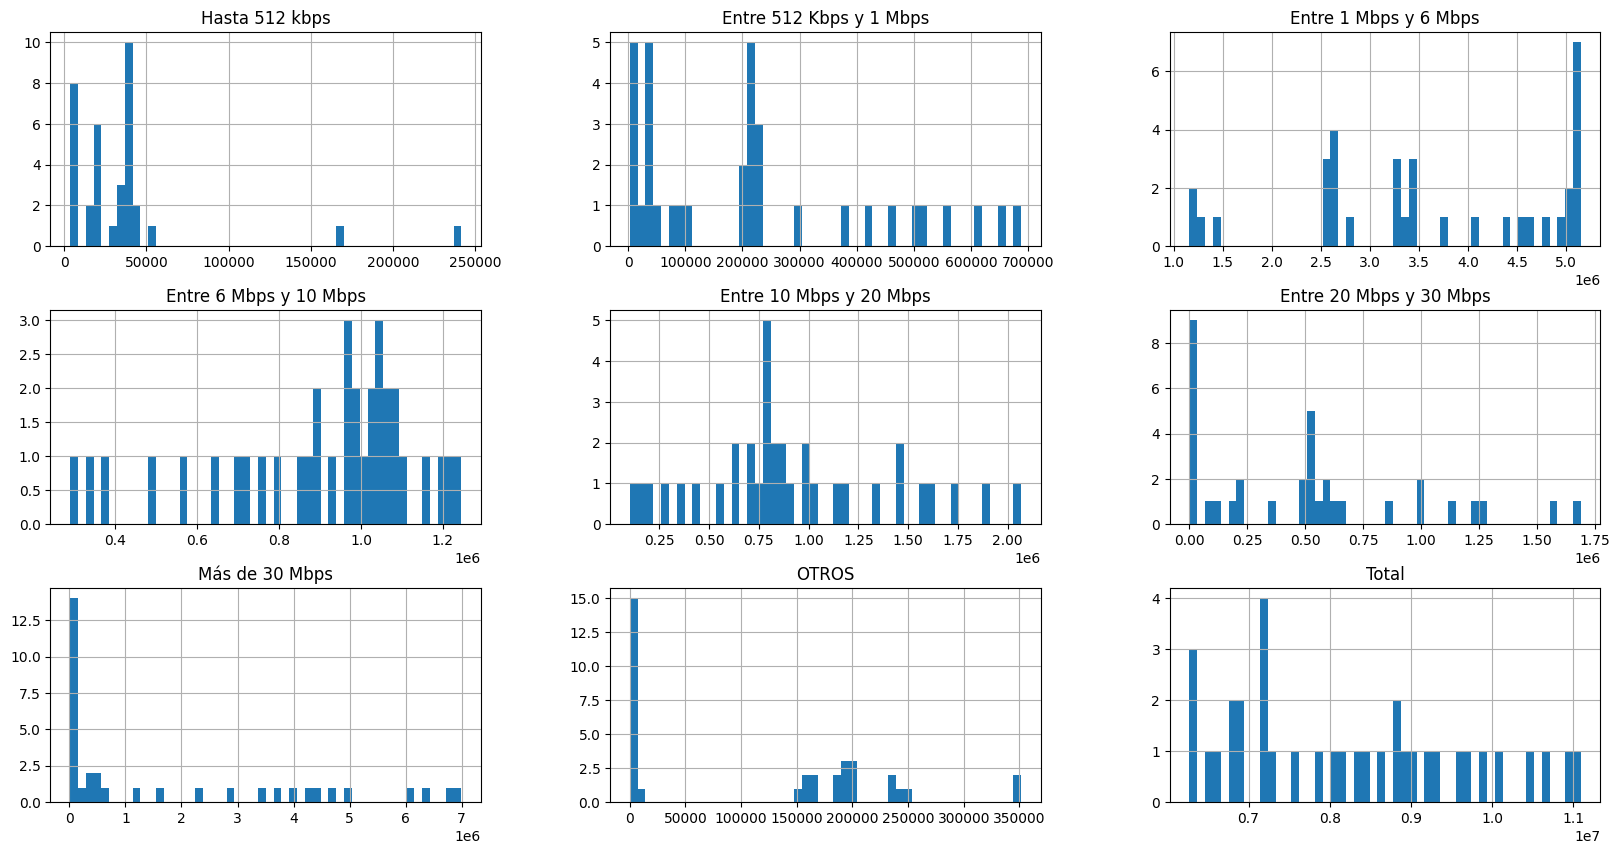

In [184]:
gDATNIfijoPorVel.hist(bins = 50, figsize = (20,10))
plt.show

nos pordemos dar cuenta que no tienen una distribucion normal, todos poseen una cola o sesgo lo que toca tener en cuenta la momento de realizar una analisis 

In [185]:
gDATNIfijoPorVel

,ID_velocidad_Bajada,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,20223,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
1,20222,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
2,20221,2022,1,3489,10484,1263273,1209148,967508,509830,6336187,198333,10624009
3,20214,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794
4,20213,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541
5,20212,2021,2,40172,42024,2531271,1080279,693277,647401,4661291,167369,9863084
6,20211,2021,1,39487,41674,2593477,1072722,737930,595920,4379965,186797,9647972
7,20204,2020,4,3951,42185,2622638,1073875,786595,582420,4239237,185102,9571562
8,20203,2020,3,41038,44005,2637984,1040017,799350,538567,4053461,201777,9356199
9,20202,2020,2,41038,4869,2651502,1053107,807775,523437,3711499,194008,9031056


Realizamos una correlacion de las velocidades

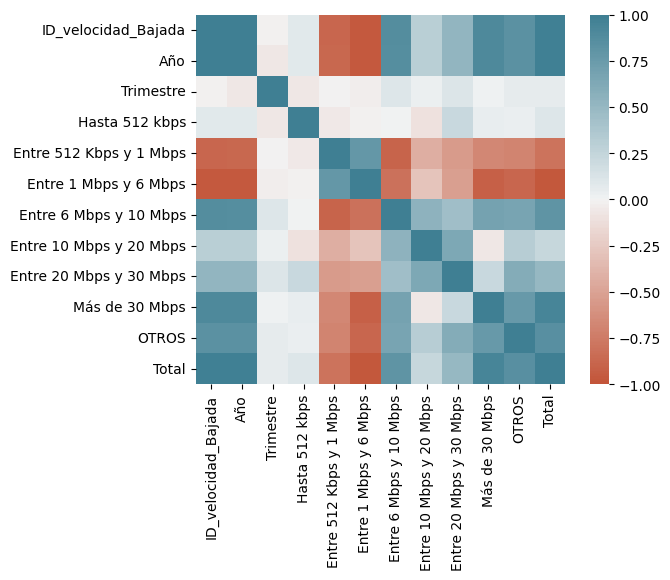

In [186]:
corr_matrix=gDATNIfijoPorVel.corr()
ax=sns.heatmap(
    corr_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )

<Axes: xlabel='Año', ylabel='Hasta 512 kbps'>

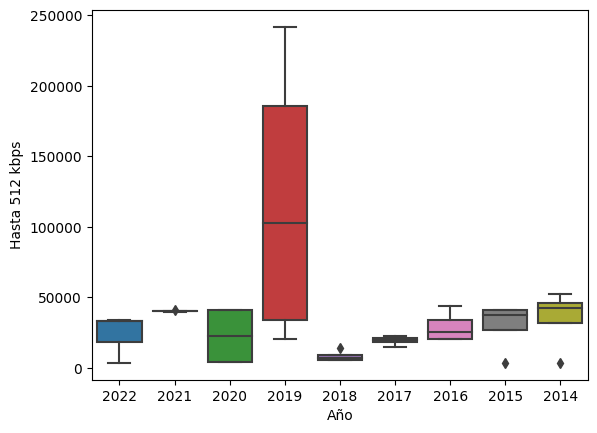

In [187]:
sns.boxplot(x="Año" , y="Hasta 512 kbps", data=gDATNIfijoPorVel)

<Axes: xlabel='Año', ylabel='Entre 20 Mbps y 30 Mbps'>

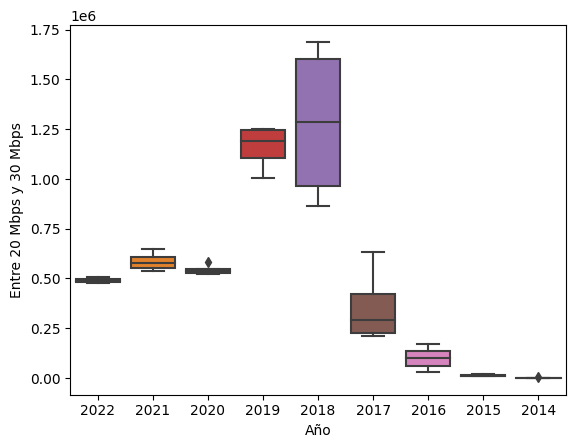

In [188]:
sns.boxplot(x="Año" , y="Entre 20 Mbps y 30 Mbps", data=gDATNIfijoPorVel)

In [189]:
PAporCadaCienHogares=pd.read_csv("http://api.datosabiertos.enacom.gob.ar/api/v2/datastreams/PENET-DEL-INTER-FIJO-51614/data.csv/?auth_key=mq92WEwEYUjLhVpFrXswBTfMiHGadguGzHVVEdlN")

In [190]:
PAporCadaCienHogares

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"
...,...,...,...,...
835,2014,1,Santa Cruz,"28,94"
836,2014,1,Santa Fe,"47,85"
837,2014,1,Santiago Del Estero,"16,31"
838,2014,1,Tierra Del Fuego,"63,97"


In [196]:
PAporCadaCienHogares[PAporCadaCienHogares["Año"]==2020].sum()

Año                                                                        193920
Trimestre                                                                     240
Provincia                       Buenos AiresCapital FederalCatamarcaChacoChubu...
Accesos por cada 100 hogares    68,98108,3149,4143,0368,3578,0842,4359,4732,49...
dtype: object

In [197]:
PAporCadaCienHogares["Año"].sum()

1695024

In [192]:
PAporCadaCienHogares["Accesos por cada 100 hogares"]

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       78,11
1      122,28
2       65,33
3       43,86
4       84,38
        ...  
835     28,94
836     47,85
837     16,31
838     63,97
839     33,42
Name: Accesos por cada 100 hogares, Length: 840, dtype: object>

In [96]:
PAporCadaCienHogares

NameError: name 'PAporCadaCienHogares' is not defined

In [206]:
PAporCadaCienHogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [208]:
PAporCadaCienHogares.describe(include="all")

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
count,840.000000,840.000000,840,840
unique,NaN,NaN,24,779
top,NaN,NaN,Buenos Aires,"32,49"
freq,NaN,NaN,35,5
mean,2017.885714,2.457143,NaN,NaN
std,2.528745,1.105009,NaN,NaN
min,2014.000000,1.000000,NaN,NaN
25%,2016.000000,1.000000,NaN,NaN
50%,2018.000000,2.000000,NaN,NaN
75%,2020.000000,3.000000,NaN,NaN


In [154]:

   #link
#para EJECUTAR la api
# https://fastapi-platafomas-streaming.onrender.com/docs
    
#python -m venv venv #--> crear el ambiente virtual desde la terminal
#crear el main.py #--> crear un archivo en el ambinete virtual
#cd
#.\venv\
#Set-ExecutionPolicy -ExecutionPolicy Remotesigned -Scope process
#.\Scripts\
#.\activate
#cd ..
#cd ..
#uvicorn main:app
#uvicorn main:app --reload  #---> para que quede cocorriendo mientras dse programa
#http://localhost:8000
#http://localhost:8000/docs 
#Para hacer del deploy --> renderizar 
#pip list
#pip uninstall pandas,numpy,etc
#uvicorn main:app --host 0.0.0.0 --port 8080  
#environment environment variables--> key:PIP_VERSION   value:22.3.1 #-->version
#pip install --upgrade scikit-learn
#pip freeze > requirements.txt
